In [1]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from operator import itemgetter

In [2]:
os.getcwd()

'/Users/Sophie/Documents/GitHub/Analysis_and_Modelling_Social_Interactions'

# Load data

In [3]:
geo = pd.read_excel('European_countries.xlsx')
geo.head()

,Origin_Country,Country_Code,AL,AT,BA,BE,BG,CH,CZ,DE,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,Total
0,Albania,AL,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
1,Austria,AT,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7
2,Bosnia and Herzegovina,BA,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
3,Belgium,BE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,Bulgaria,BG,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,5


In [4]:
# drop unnecessary columns
df_geo = geo.drop(['Origin_Country', 'Total'], axis=1)

# pivot the table from wide to long
Country_list = list(df_geo.columns)
df_geo = df_geo.melt(id_vars=['Country_Code'], var_name='Destination', value_vars=(Country_list[1:]), value_name='Sharing_Border')
df_geo.rename(columns={'Country_Code':'Origin'}, inplace=True)

# drop NAs and 0
df_geo.dropna(axis=0, inplace=True)
df_geo = df_geo[df_geo.Sharing_Border != 0]
df_geo = df_geo.sort_values(by='Origin')
df_geo.head()

,Origin,Destination,Sharing_Border
782,AL,MK,1.0
476,AL,GR,1.0
748,AL,ME,1.0
986,AL,RS,1.0
205,AT,CZ,1.0


In [7]:
graph_geo = np.asarray(df_geo[['Origin', 'Destination']])
nodes_geo = np.unique(graph_geo)
weights = list(map(float, df_geo['Sharing_Border']))
G_geo = nx.Graph()

for node in nodes_geo:
    G_geo.add_node(node)

graph_geo = []
for edge in graph_geo:
    G_geo.add_edge(edge[0], edge[1])
    graph_geo.append((edge[0], edge[1]))

labels = dict(list(zip(graph_geo, weights)))

/usr/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


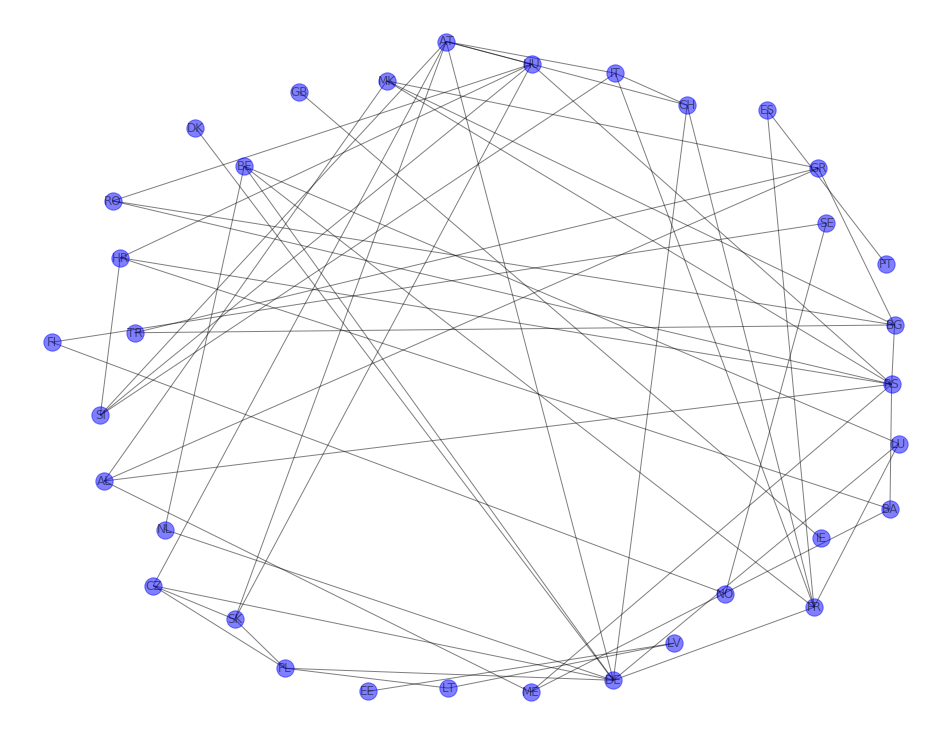

In [8]:
plt.figure(figsize=(13,10))
pos = nx.spring_layout(G_geo, scale = 2)
G_geo = nx.from_pandas_edgelist(df_geo, 'Origin', 'Destination')
nx.draw(G_geo, pos, node_color='blue', style='solid', with_labels=True, alpha=0.5)